In [1]:
# Import libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
df_allscenarios = pd.read_excel('AllScenariosPreped.xlsx')

In [2]:
df_allscenarios=df_allscenarios.drop(columns= [ "Unnamed: 0", "Unnamed: 0.1", "index"])

<h2>Cue, Informed by staff<h2>
<h3>Average response time<h3>

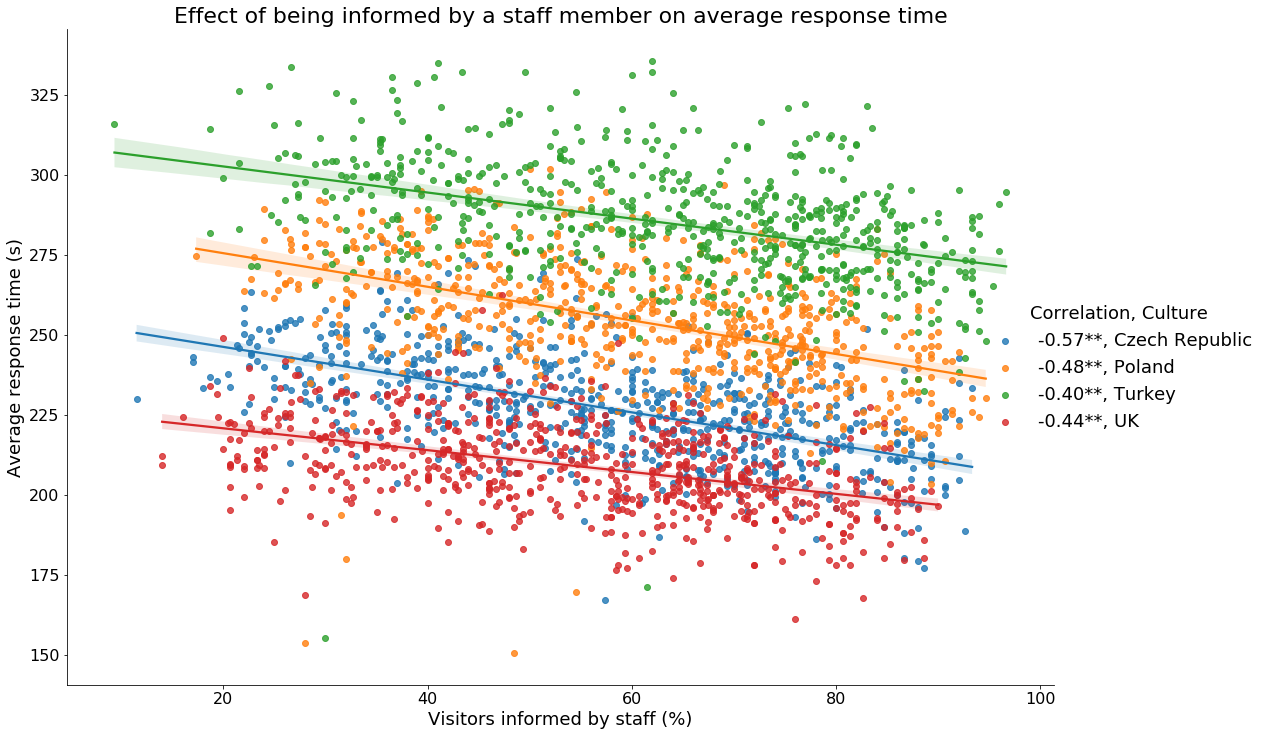

In [49]:
#AvgResp
sns.set_palette("tab10")
df_cue_staff=df_allscenarios.loc[df_allscenarios[ "Familiarity"]==50]
df_cue_staff=df_cue_staff.loc[df_cue_staff[ "Chance_friends_in_building"]==30]
df_cue_staff=df_cue_staff.loc[df_cue_staff[ "Num_Visitors"]<201]
df_cue_staff=df_cue_staff.loc[df_cue_staff[ "Num_Visitors"]>99]
# Delete outliers
df_cue_staff_avgresp=df_cue_staff.loc[df_cue_staff[ "AvgrespVist"]>150]
df_cue_staff_avgresp=df_cue_staff_avgresp.loc[df_cue_staff_avgresp[ "AvgrespVist"]<350]



g=sns.lmplot(data=df_cue_staff_avgresp, x="Visitors_informed_by_staff_percentage" , y="AvgrespVist", hue= "Culture",  height = 10, aspect = 1.5,
             robust=False,  hue_order=["Czech Republic", "Poland", "Turkey", "UK"]);
new_labels = ['-0.57**, Czech Republic', '-0.48**, Poland', "-0.40**, Turkey", "-0.44**, UK"]
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.rc('legend',fontsize=16)

g._legend.set_title("Correlation, Culture",prop={'size':18})

plt.xlabel('Visitors informed by staff (%)', fontsize= 18)
plt.ylabel('Average response time (s)', fontsize= 18)

plt.title("Effect of being informed by a staff member on average response time", fontsize=22)
plt.show(g)
g.savefig("InformedStaffAvgresp.png", dpi=300, bbox_inches='tight')



In [5]:
df_cue_staff_avgresp.groupby(["Culture"])[["Visitors_informed_by_staff_percentage", 'AvgrespVist']].corr()

Visitors_informed_by_staff_percentage  \
Culture                                                                                       
Czech Republic Visitors_informed_by_staff_percentage                               1.000000   
               AvgrespVist                                                        -0.575517   
Poland         Visitors_informed_by_staff_percentage                               1.000000   
               AvgrespVist                                                        -0.482012   
Turkey         Visitors_informed_by_staff_percentage                               1.000000   
               AvgrespVist                                                        -0.400672   
UK             Visitors_informed_by_staff_percentage                               1.000000   
               AvgrespVist                                                        -0.436515   

                                                      AvgrespVist  
Culture                                                            
Czech Republic Visitors_informed_by_staff_percentage    -0.575517  
               AvgrespVist                               1.000000  
Poland         Visitors_informed_by_staff_percentage    -0.482012  
               AvgrespVist                               1.000000  
Turkey         Visitors_informed_by_staff_percentage    -0.400672  
               AvgrespVist                               1.000000  
UK             Visitors_informed_by_staff_percentage    -0.436515  
               AvgrespVist                               1.000000

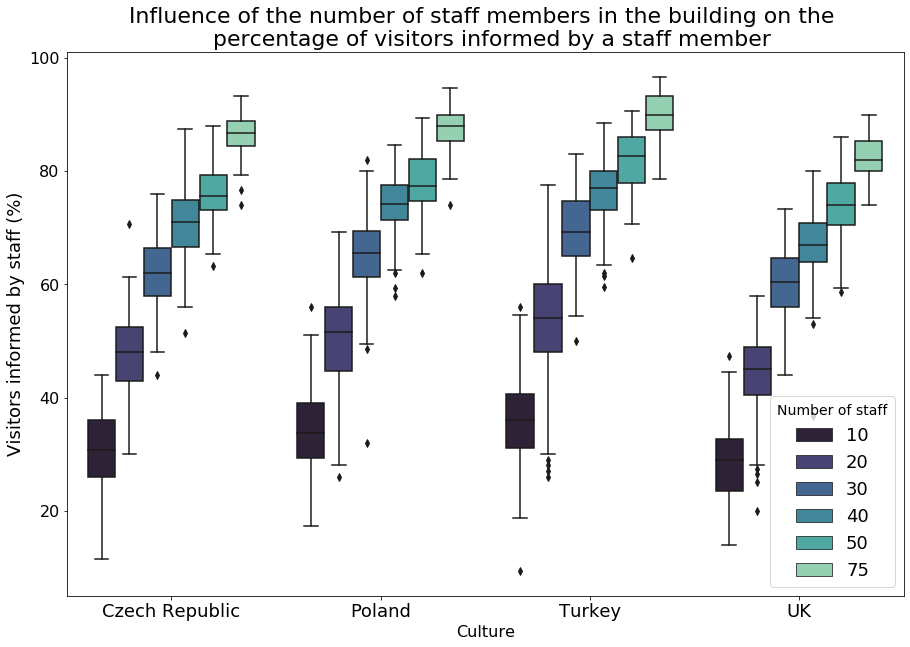

In [57]:
sns.set_palette("mako")
plt.figure(figsize=(15,10))
plt.title("Influence of the number of staff members in the building on the \n percentage of visitors informed by a staff member", fontsize=22)

g=sns.boxplot(x="Culture", y="Visitors_informed_by_staff_percentage", data=df_cue_staff, hue= "Num_staff", order=["Czech Republic", "Poland", "Turkey", "UK"]);
g.set_ylabel ( "Visitors informed by staff (%)", fontsize= 18)
plt.rc('legend',fontsize=16)
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['xtick.labelsize'] = 18
plt.legend(title='Number of staff', fontsize=18)


plt.savefig("StaffVSInformedstaff.png", dpi=300, bbox_inches='tight')

In [69]:
from scipy.stats.stats import pearsonr
# Test correlation and significance
df_cue_staff_cz=df_cue_staff_avgresp[df_cue_staff_avgresp.Culture == "Czech Republic"]
df_cue_staff_cz_vistInformed= df_cue_staff_cz[ "Visitors_informed_by_staff_percentage"]
df_cue_staff_cz_Avgresp = df_cue_staff_cz["AvgrespVist"]

df_cue_staff_po=df_cue_staff_avgresp[df_cue_staff_avgresp.Culture == "Poland"]
df_cue_staff_po_vistInformed= df_cue_staff_po[ "Visitors_informed_by_staff_percentage"]
df_cue_staff_po_Avgresp = df_cue_staff_po["AvgrespVist"]

df_cue_staff_tu=df_cue_staff_avgresp[df_cue_staff_avgresp.Culture == "Turkey"]
df_cue_staff_tu_vistInformed= df_cue_staff_tu[ "Visitors_informed_by_staff_percentage"]
df_cue_staff_tu_Avgresp = df_cue_staff_tu["AvgrespVist"]

df_cue_staff_uk=df_cue_staff_avgresp[df_cue_staff_avgresp.Culture == "UK"]
df_cue_staff_uk_vistInformed= df_cue_staff_uk[ "Visitors_informed_by_staff_percentage"]
df_cue_staff_uk_Avgresp = df_cue_staff_uk["AvgrespVist"]




print ("Czech Republic:", pearsonr(df_cue_staff_cz_vistInformed, df_cue_staff_cz_Avgresp))
print ("Poland:",pearsonr(df_cue_staff_po_vistInformed, df_cue_staff_po_Avgresp))
print ("Turkey:",pearsonr(df_cue_staff_tu_vistInformed, df_cue_staff_tu_Avgresp))
print ("UK:",pearsonr(df_cue_staff_uk_vistInformed, df_cue_staff_uk_Avgresp))

Czech Republic: (-0.5755172390968073, 2.7781234393486127e-62)
Poland: (-0.4820121062384412, 7.811715899480021e-42)
Turkey: (-0.4006718213146118, 2.240072866840587e-28)
UK: (-0.43651547394136464, 4.547185821158473e-34)


<h3>Total evacuation time<h3>

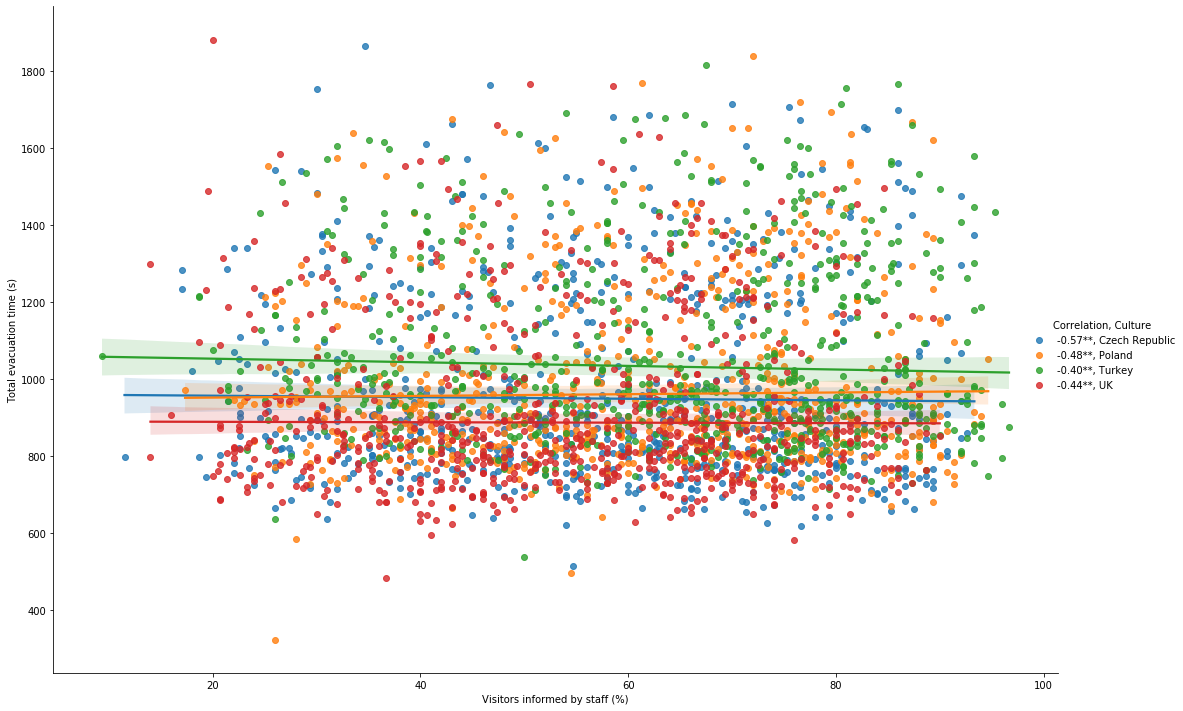

In [9]:
#Total evac

# Delete outliers
#df_cue_staff_totalevacp=df_cue_staff.loc[df_cue_staff[ "AvgrespVist"]>150]
#df_cue_staff_totalevac=df_cue_staff_avgresp.loc[df_cue_staff_avgresp[ "AvgrespVist"]<350]

g=sns.lmplot(data=df_cue_staff, x="Visitors_informed_by_staff_percentage" , y="Total_evacuation_time", hue= "Culture",  height = 10, aspect = 1.5,  robust=True,  hue_order=["Czech Republic", "Poland", "Turkey", "UK"]);
#new_labels = ['-0.57, Czech Republic', '-0.48, Poland', "-0.40, Turkey", "-0.44, UK"]
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


plt.rc('legend',fontsize=16)

g._legend.set_title("Correlation, Culture",prop={'size':16})

plt.xlabel('Visitors informed by staff (%)', fontsize= 16)
plt.ylabel('Total evacuation time (s)', fontsize= 16)

plt.title("Effect of being informed by a staff member on total evacuati time", fontsize=20)
plt.show(g)
g.savefig("InformedStafftotevac.png", dpi=300, bbox_inches='tight')


In [10]:
df_cue_staff.groupby(["Culture"])[["Visitors_informed_by_staff_percentage", 'Total_evacuation_time']].corr()

Visitors_informed_by_staff_percentage  \
Culture                                                                                       
Czech Republic Visitors_informed_by_staff_percentage                               1.000000   
               Total_evacuation_time                                               0.002223   
Poland         Visitors_informed_by_staff_percentage                               1.000000   
               Total_evacuation_time                                               0.043724   
Turkey         Visitors_informed_by_staff_percentage                               1.000000   
               Total_evacuation_time                                              -0.024315   
UK             Visitors_informed_by_staff_percentage                               1.000000   
               Total_evacuation_time                                              -0.012293   

                                                      Total_evacuation_time  
Culture                                                                      
Czech Republic Visitors_informed_by_staff_percentage               0.002223  
               Total_evacuation_time                               1.000000  
Poland         Visitors_informed_by_staff_percentage               0.043724  
               Total_evacuation_time                               1.000000  
Turkey         Visitors_informed_by_staff_percentage              -0.024315  
               Total_evacuation_time                               1.000000  
UK             Visitors_informed_by_staff_percentage              -0.012293  
               Total_evacuation_time                               1.000000

<h3>Evac95<h3>

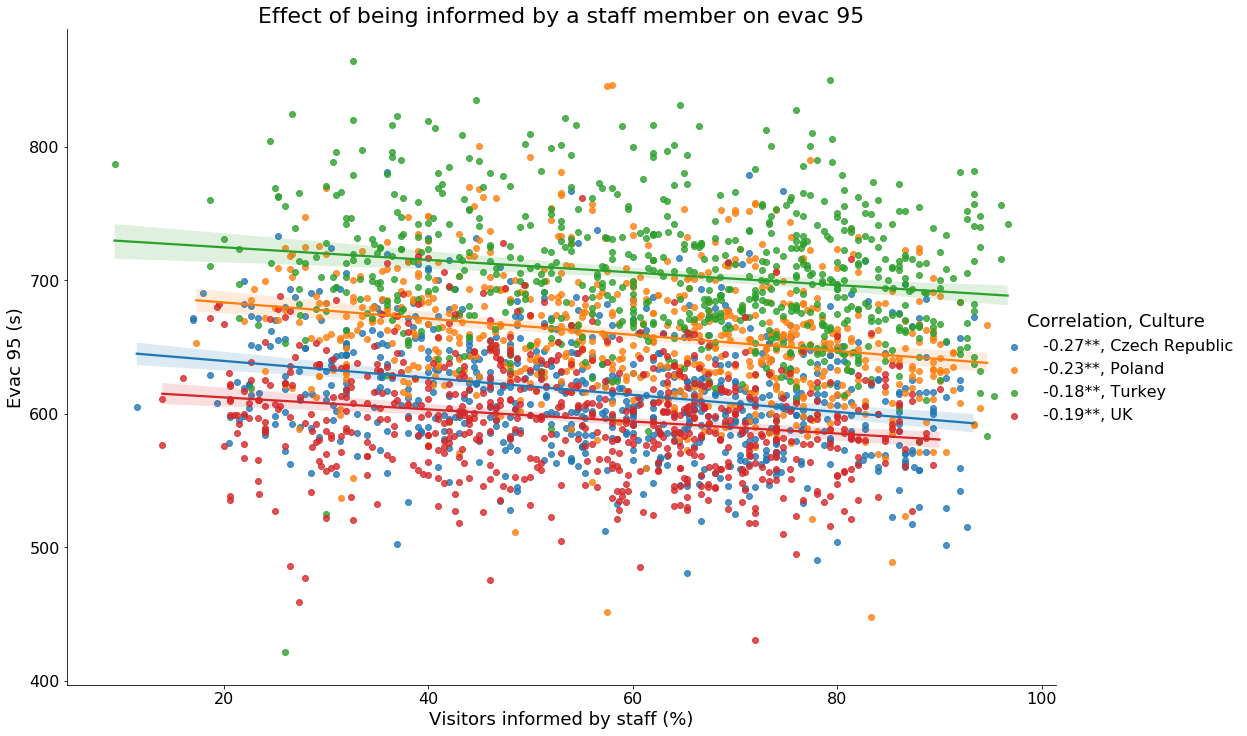

In [50]:
# Evac95
sns.set_palette("tab10")
# Delete outliers
df_cue_staff_evac95=df_cue_staff.loc[df_cue_staff[ "Evac95"]>400]
df_cue_staff_evac95=df_cue_staff_evac95.loc[df_cue_staff_evac95[ "Evac95"]<880]



g=sns.lmplot(data=df_cue_staff_evac95, x="Visitors_informed_by_staff_percentage" , y="Evac95", hue= "Culture",  height = 10, aspect = 1.5,  robust=False,  hue_order=["Czech Republic", "Poland", "Turkey", "UK"]);
new_labels = ['-0.27**, Czech Republic', '-0.23**, Poland', "-0.18**, Turkey", "-0.19**, UK"]
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


plt.rc('legend',fontsize=16)

g._legend.set_title("Correlation, Culture",prop={'size':18})

plt.xlabel('Visitors informed by staff (%)', fontsize= 18)
plt.ylabel('Evac 95 (s)', fontsize= 18)

plt.title("Effect of being informed by a staff member on evac 95", fontsize=22)
plt.show(g)
g.savefig("InformedStaffevac95.png", dpi=300, bbox_inches='tight')


In [12]:
df_cue_staff_evac95.groupby(["Culture"])[["Visitors_informed_by_staff_percentage", 'Evac95']].corr()

Visitors_informed_by_staff_percentage  \
Culture                                                                                       
Czech Republic Visitors_informed_by_staff_percentage                               1.000000   
               Evac95                                                             -0.267850   
Poland         Visitors_informed_by_staff_percentage                               1.000000   
               Evac95                                                             -0.233039   
Turkey         Visitors_informed_by_staff_percentage                               1.000000   
               Evac95                                                             -0.179976   
UK             Visitors_informed_by_staff_percentage                               1.000000   
               Evac95                                                             -0.194279   

                                                        Evac95  
Culture                                                         
Czech Republic Visitors_informed_by_staff_percentage -0.267850  
               Evac95                                 1.000000  
Poland         Visitors_informed_by_staff_percentage -0.233039  
               Evac95                                 1.000000  
Turkey         Visitors_informed_by_staff_percentage -0.179976  
               Evac95                                 1.000000  
UK             Visitors_informed_by_staff_percentage -0.194279  
               Evac95                                 1.000000

In [13]:
# Test correlation and significance
df_cue_staff_cz=df_cue_staff_evac95[df_cue_staff_evac95.Culture == "Czech Republic"]
df_cue_staff_cz_vistInformed= df_cue_staff_cz[ "Visitors_informed_by_staff_percentage"]
df_cue_staff_cz_Evac95 = df_cue_staff_cz["Evac95"]

df_cue_staff_po=df_cue_staff_evac95[df_cue_staff_evac95.Culture == "Poland"]
df_cue_staff_po_vistInformed= df_cue_staff_po[ "Visitors_informed_by_staff_percentage"]
df_cue_staff_po_Evac95 = df_cue_staff_po["Evac95"]

df_cue_staff_tu=df_cue_staff_evac95[df_cue_staff_evac95.Culture == "Turkey"]
df_cue_staff_tu_vistInformed= df_cue_staff_tu[ "Visitors_informed_by_staff_percentage"]
df_cue_staff_tu_Evac95 = df_cue_staff_tu["Evac95"]

df_cue_staff_uk=df_cue_staff_evac95[df_cue_staff_evac95.Culture == "UK"]
df_cue_staff_uk_vistInformed= df_cue_staff_uk[ "Visitors_informed_by_staff_percentage"]
df_cue_staff_uk_Evac95 = df_cue_staff_uk["Evac95"]


print ("Czech Republic:", pearsonr(df_cue_staff_cz_vistInformed, df_cue_staff_cz_Evac95))
print ("Poland:",pearsonr(df_cue_staff_po_vistInformed, df_cue_staff_po_Evac95))
print ("Turkey:",pearsonr(df_cue_staff_tu_vistInformed, df_cue_staff_tu_Evac95))
print ("UK:",pearsonr(df_cue_staff_uk_vistInformed, df_cue_staff_uk_Evac95))


Czech Republic: (-0.2678499396263688, 7.800799299218235e-13)
Poland: (-0.2330390102084424, 4.883120231281913e-10)
Turkey: (-0.17997603583060692, 1.67649976437799e-06)
UK: (-0.19427851005084273, 2.0045867824378318e-07)


<h3>Average evacuation time<h3>

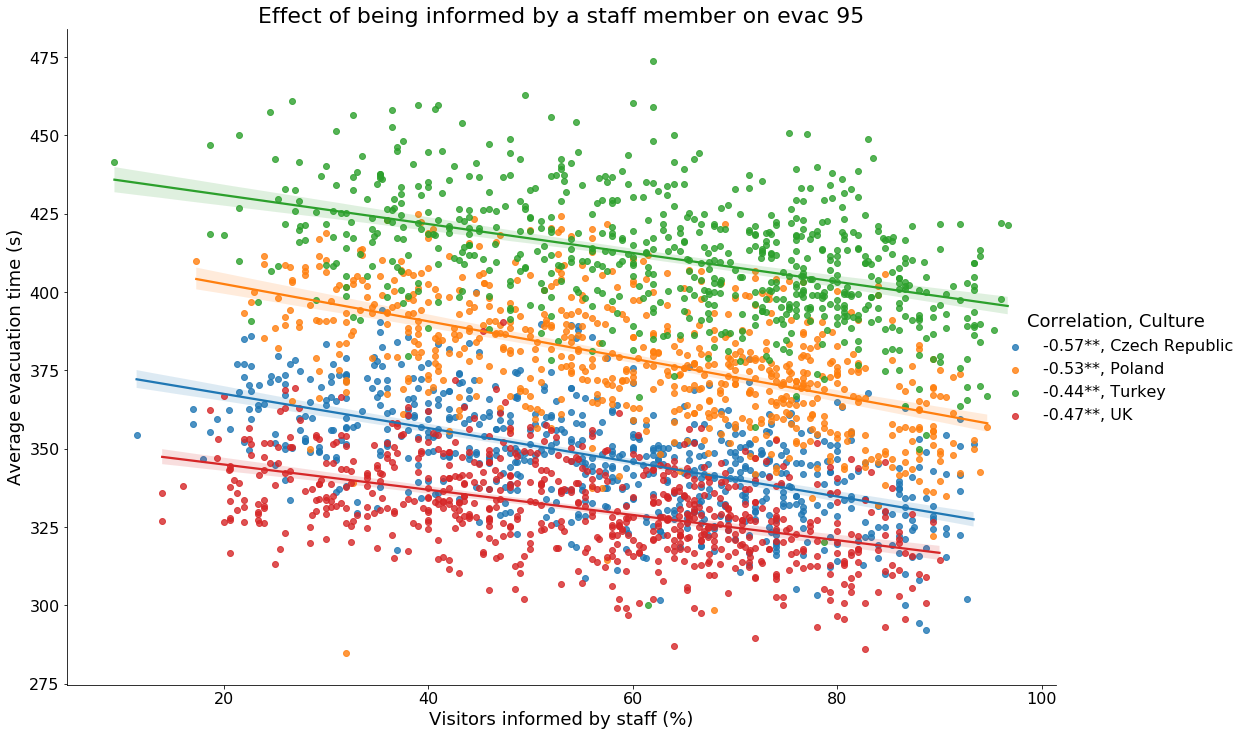

In [52]:
# Avg Evac

# Delete outliers
df_cue_staff_avgevac=df_cue_staff.loc[df_cue_staff[ "AvgevacVist"]>280]
df_cue_staff_avgevac=df_cue_staff_avgevac.loc[df_cue_staff_avgevac[ "AvgevacVist"]<480]

g=sns.lmplot(data=df_cue_staff_avgevac, x="Visitors_informed_by_staff_percentage" , y="AvgevacVist", hue= "Culture", robust=False,  height = 10, aspect = 1.5,   hue_order=["Czech Republic", "Poland", "Turkey", "UK"]);
new_labels = ['-0.57**, Czech Republic', '-0.53**, Poland', "-0.44**, Turkey", "-0.47**, UK"]
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


g._legend.set_title("Correlation, Culture")


plt.rc('legend',fontsize=18)

g._legend.set_title("Correlation, Culture",prop={'size':18})

plt.xlabel('Visitors informed by staff (%)', fontsize= 18)
plt.ylabel('Average evacuation time (s)', fontsize= 18)

plt.title("Effect of being informed by a staff member on evac 95", fontsize=22)
plt.show(g)
g.savefig("InformedStaffavgEvac.png", dpi=300, bbox_inches='tight')

In [16]:
df_cue_staff_avgevac.groupby(["Culture"])[["Visitors_informed_by_staff_percentage", 'AvgevacVist']].corr()


Visitors_informed_by_staff_percentage  \
Culture                                                                                       
Czech Republic Visitors_informed_by_staff_percentage                               1.000000   
               AvgevacVist                                                        -0.571305   
Poland         Visitors_informed_by_staff_percentage                               1.000000   
               AvgevacVist                                                        -0.532551   
Turkey         Visitors_informed_by_staff_percentage                               1.000000   
               AvgevacVist                                                        -0.439103   
UK             Visitors_informed_by_staff_percentage                               1.000000   
               AvgevacVist                                                        -0.474412   

                                                      AvgevacVist  
Culture                                                            
Czech Republic Visitors_informed_by_staff_percentage    -0.571305  
               AvgevacVist                               1.000000  
Poland         Visitors_informed_by_staff_percentage    -0.532551  
               AvgevacVist                               1.000000  
Turkey         Visitors_informed_by_staff_percentage    -0.439103  
               AvgevacVist                               1.000000  
UK             Visitors_informed_by_staff_percentage    -0.474412  
               AvgevacVist                               1.000000

In [17]:
df_cue_staff_cz=df_cue_staff_avgevac[df_cue_staff_avgevac.Culture == "Czech Republic"]
df_cue_staff_cz_vistInformed= df_cue_staff_cz[ "Visitors_informed_by_staff_percentage"]
df_cue_staff_cz_Avgevac = df_cue_staff_cz["AvgevacVist"]

df_cue_staff_po=df_cue_staff_avgevac[df_cue_staff_avgevac.Culture == "Poland"]
df_cue_staff_po_vistInformed= df_cue_staff_po[ "Visitors_informed_by_staff_percentage"]
df_cue_staff_po_Avgevac = df_cue_staff_po["AvgevacVist"]

df_cue_staff_tu=df_cue_staff_avgevac[df_cue_staff_avgevac.Culture == "Turkey"]
df_cue_staff_tu_vistInformed= df_cue_staff_tu[ "Visitors_informed_by_staff_percentage"]
df_cue_staff_tu_Avgevac = df_cue_staff_tu["AvgevacVist"]

df_cue_staff_uk=df_cue_staff_avgevac[df_cue_staff_avgevac.Culture == "UK"]
df_cue_staff_uk_vistInformed= df_cue_staff_uk[ "Visitors_informed_by_staff_percentage"]
df_cue_staff_uk_Avgevac = df_cue_staff_uk["AvgevacVist"]


print ("Czech Republic:", pearsonr(df_cue_staff_cz_vistInformed, df_cue_staff_cz_Avgevac))
print ("Poland:",pearsonr(df_cue_staff_po_vistInformed, df_cue_staff_po_Avgevac))
print ("Turkey:",pearsonr(df_cue_staff_tu_vistInformed, df_cue_staff_tu_Avgevac))
print ("UK:",pearsonr(df_cue_staff_uk_vistInformed, df_cue_staff_uk_Avgevac))


Czech Republic: (-0.5713046465124653, 4.0876805650584395e-61)
Poland: (-0.5325511985494236, 6.03733680280788e-52)
Turkey: (-0.4391027881947855, 2.6053090118158627e-34)
UK: (-0.4744120166741536, 1.4283261259525618e-40)


<h2>Cue, Fire seen<h2>
<h3>Average response time<h3>

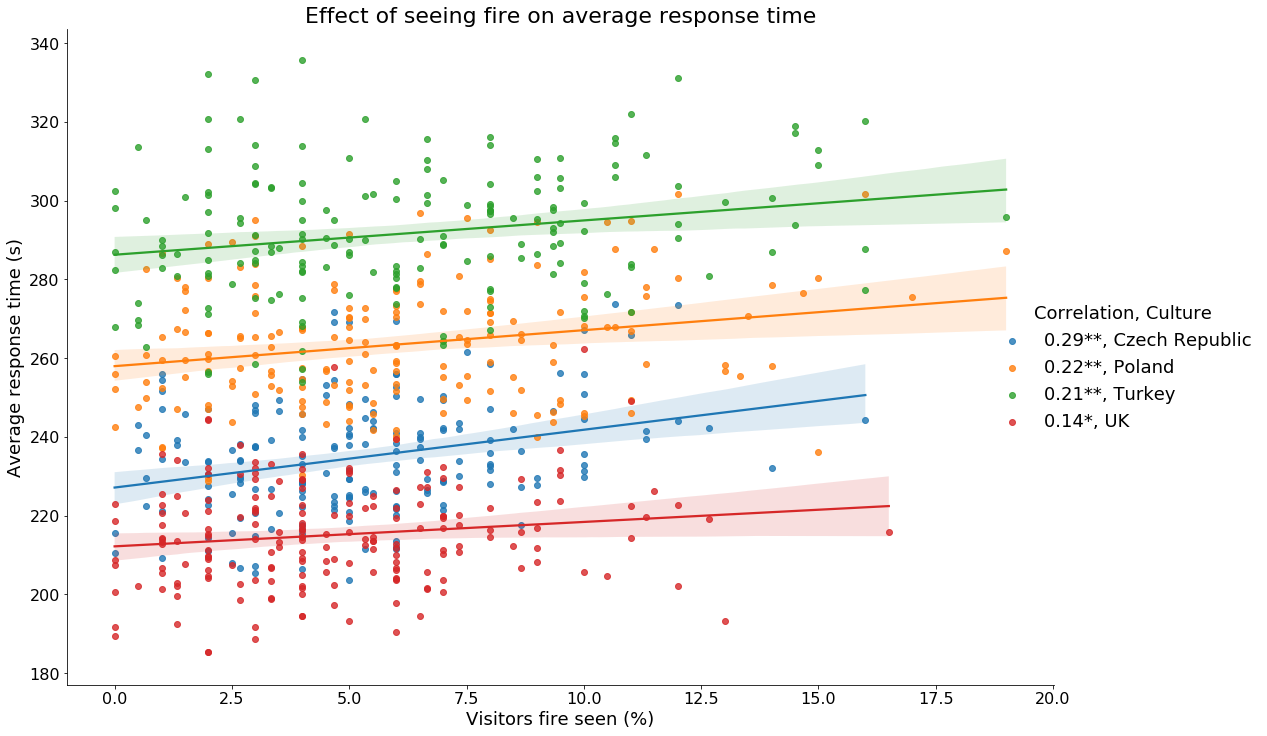

In [53]:
#CUE: Fire seen

#AvgResp
sns.set_palette("tab10")
df_cue_fire=df_allscenarios.loc[df_allscenarios[ "Familiarity"]==50]
df_cue_fire=df_cue_fire.loc[df_cue_fire[ "Chance_friends_in_building"]==30]
df_cue_fire=df_cue_fire.loc[df_cue_fire[ "Num_Visitors"]<201]
df_cue_fire=df_cue_fire.loc[df_cue_fire[ "Num_Visitors"]>99]
df_cue_fire=df_cue_fire.loc[df_cue_fire[ "Num_staff"]==20]
df_cue_fire=df_cue_fire.loc[df_cue_fire[ "Visitors_fire_seen_percentage"]<20]

# Delete outliers
df_cue_fire_avgresp=df_cue_fire.loc[df_cue_fire[ "AvgrespVist"]>175]
df_cue_fire_avgresp=df_cue_fire_avgresp.loc[df_cue_fire_avgresp[ "AvgrespVist"]<350]

g=sns.lmplot(data=df_cue_fire_avgresp, x="Visitors_fire_seen_percentage" , y="AvgrespVist", hue= "Culture", robust=False,  height = 10, aspect = 1.5,    hue_order=["Czech Republic", "Poland", "Turkey", "UK"]);#
new_labels = ['0.29**, Czech Republic', '0.22**, Poland', "0.21**, Turkey", "0.14*, UK"]
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


plt.rc('legend',fontsize=18)

g._legend.set_title("Correlation, Culture",prop={'size':18})

plt.xlabel('Visitors fire seen (%)', fontsize= 18)
plt.ylabel('Average response time (s)', fontsize= 18)

plt.title("Effect of seeing fire on average response time", fontsize=22)
plt.show(g)
g.savefig("FireAvgresp.png", dpi=300, bbox_inches='tight')


In [21]:
df_cue_fire_avgresp.groupby(["Culture"])[["Visitors_fire_seen_percentage", 'AvgrespVist']].corr()

Visitors_fire_seen_percentage  \
Culture                                                                       
Czech Republic Visitors_fire_seen_percentage                       1.000000   
               AvgrespVist                                         0.294383   
Poland         Visitors_fire_seen_percentage                       1.000000   
               AvgrespVist                                         0.221339   
Turkey         Visitors_fire_seen_percentage                       1.000000   
               AvgrespVist                                         0.214840   
UK             Visitors_fire_seen_percentage                       1.000000   
               AvgrespVist                                         0.143878   

                                              AvgrespVist  
Culture                                                    
Czech Republic Visitors_fire_seen_percentage     0.294383  
               AvgrespVist                       1.000000  
Poland         Visitors_fire_seen_percentage     0.221339  
               AvgrespVist                       1.000000  
Turkey         Visitors_fire_seen_percentage     0.214840  
               AvgrespVist                       1.000000  
UK             Visitors_fire_seen_percentage     0.143878  
               AvgrespVist                       1.000000

In [1]:
# Test correlation and significance
df_cue_fire_cz=df_cue_fire_avgresp[df_cue_fire_avgresp.Culture == "Czech Republic"]
df_cue_fire_cz_vistfireseen= df_cue_fire_cz[ "Visitors_fire_seen_percentage"]
df_cue_fire_cz_Avgresp = df_cue_fire_cz["AvgrespVist"]

df_cue_fire_po=df_cue_fire_avgresp[df_cue_fire_avgresp.Culture == "Poland"]
df_cue_fire_po_vistfireseen= df_cue_fire_po[ "Visitors_fire_seen_percentage"]
df_cue_fire_po_Avgresp = df_cue_fire_po["AvgrespVist"]

df_cue_fire_tu=df_cue_fire_avgresp[df_cue_fire_avgresp.Culture == "Turkey"]
df_cue_fire_tu_vistfireseen= df_cue_fire_tu[ "Visitors_fire_seen_percentage"]
df_cue_fire_tu_Avgresp = df_cue_fire_tu["AvgrespVist"]

df_cue_fire_uk=df_cue_fire_avgresp[df_cue_fire_avgresp.Culture == "UK"]
df_cue_fire_uk_vistfireseen= df_cue_fire_uk[ "Visitors_fire_seen_percentage"]
df_cue_fire_uk_Avgresp = df_cue_fire_uk["AvgrespVist"]


print ("Czech Republic:", pearsonr(df_cue_fire_cz_vistfireseen, df_cue_fire_cz_Avgresp))
print ("Poland:",pearsonr(df_cue_fire_po_vistfireseen, df_cue_fire_po_Avgresp))
print ("Turkey:",pearsonr(df_cue_fire_tu_vistfireseen, df_cue_fire_tu_Avgresp))
print ("UK:",pearsonr(df_cue_fire_uk_vistfireseen, df_cue_fire_uk_Avgresp))


NameError: name 'df_cue_fire_avgresp' is not defined

<h3>Evac95<h3>

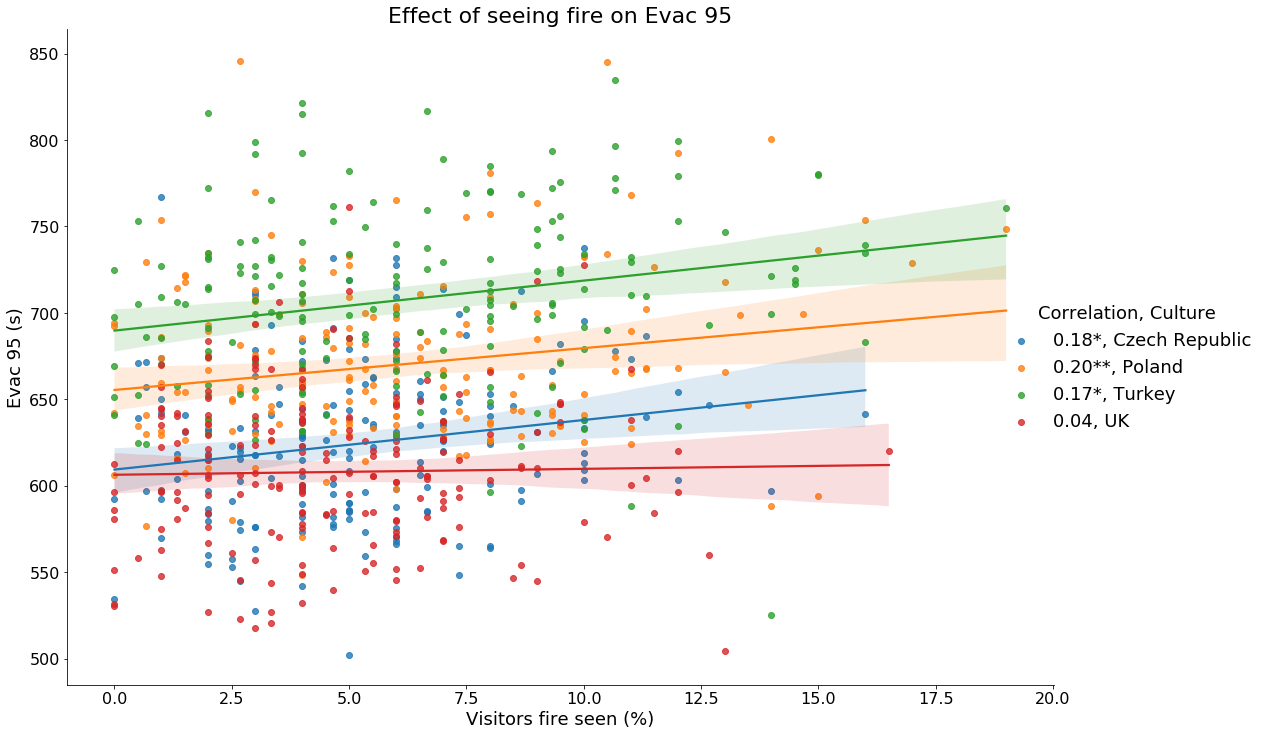

In [54]:
# Delete outliers
df_cue_fire_evac95=df_cue_fire.loc[df_cue_fire[ "Evac95"]>500]


g=sns.lmplot(data=df_cue_fire_evac95, x="Visitors_fire_seen_percentage" , y="Evac95", hue= "Culture", robust=True,  height = 10, aspect = 1.5,    hue_order=["Czech Republic", "Poland", "Turkey", "UK"]);#
new_labels = ['0.18*, Czech Republic', '0.20**, Poland', "0.17*, Turkey", "0.04, UK"]
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


plt.rc('legend',fontsize=18)

g._legend.set_title("Correlation, Culture",prop={'size':18})

plt.xlabel('Visitors fire seen (%)', fontsize= 18)
plt.ylabel('Evac 95 (s)', fontsize= 18)

plt.title("Effect of seeing fire on Evac 95", fontsize=22)
plt.show(g)
g.savefig("FireEvac95.png", dpi=300, bbox_inches='tight')


In [25]:
df_cue_fire_evac95.groupby(["Culture"])[["Visitors_fire_seen_percentage", 'Evac95']].corr()

Visitors_fire_seen_percentage  \
Culture                                                                       
Czech Republic Visitors_fire_seen_percentage                       1.000000   
               Evac95                                              0.178068   
Poland         Visitors_fire_seen_percentage                       1.000000   
               Evac95                                              0.202051   
Turkey         Visitors_fire_seen_percentage                       1.000000   
               Evac95                                              0.168584   
UK             Visitors_fire_seen_percentage                       1.000000   
               Evac95                                              0.037618   

                                                Evac95  
Culture                                                 
Czech Republic Visitors_fire_seen_percentage  0.178068  
               Evac95                         1.000000  
Poland         Visitors_fire_seen_percentage  0.202051  
               Evac95                         1.000000  
Turkey         Visitors_fire_seen_percentage  0.168584  
               Evac95                         1.000000  
UK             Visitors_fire_seen_percentage  0.037618  
               Evac95                         1.000000

In [26]:
# Test correlation and significance
df_cue_fire_cz=df_cue_fire_evac95[df_cue_fire_evac95.Culture == "Czech Republic"]
df_cue_fire_cz_vistfireseen= df_cue_fire_cz[ "Visitors_fire_seen_percentage"]
df_cue_fire_cz_Evac95 = df_cue_fire_cz["Evac95"]

df_cue_fire_po=df_cue_fire_evac95[df_cue_fire_evac95.Culture == "Poland"]
df_cue_fire_po_vistfireseen= df_cue_fire_po[ "Visitors_fire_seen_percentage"]
df_cue_fire_po_Evac95 = df_cue_fire_po["Evac95"]

df_cue_fire_tu=df_cue_fire_evac95[df_cue_fire_evac95.Culture == "Turkey"]
df_cue_fire_tu_vistfireseen= df_cue_fire_tu[ "Visitors_fire_seen_percentage"]
df_cue_fire_tu_Evac95 = df_cue_fire_tu["Evac95"]

df_cue_fire_uk=df_cue_fire_evac95[df_cue_fire_evac95.Culture == "UK"]
df_cue_fire_uk_vistfireseen= df_cue_fire_uk[ "Visitors_fire_seen_percentage"]
df_cue_fire_uk_Evac95 = df_cue_fire_uk["Evac95"]


#print(df_cue_fire_evac95.groupby(["Culture"])[["Visitors_informed_by_fire_percentage", 'Evac95Vist']])

# [["Visitors_informed_by_fire_percentage", 'Evac95Vist']].pearsonr()

print ("Czech Republic:", pearsonr(df_cue_fire_cz_vistfireseen, df_cue_fire_cz_Evac95))
print ("Poland:",pearsonr(df_cue_fire_po_vistfireseen, df_cue_fire_po_Evac95))
print ("Turkey:",pearsonr(df_cue_fire_tu_vistfireseen, df_cue_fire_tu_Evac95))
print ("UK:",pearsonr(df_cue_fire_uk_vistfireseen, df_cue_fire_uk_Evac95))


Czech Republic: (0.17806831891628028, 0.015308900210135663)
Poland: (0.20205076669297217, 0.004724327757014276)
Turkey: (0.16858416509452573, 0.02329165005181102)
UK: (0.03761827846886029, 0.6034826535793025)


<h3>Average evacuation time<h3>

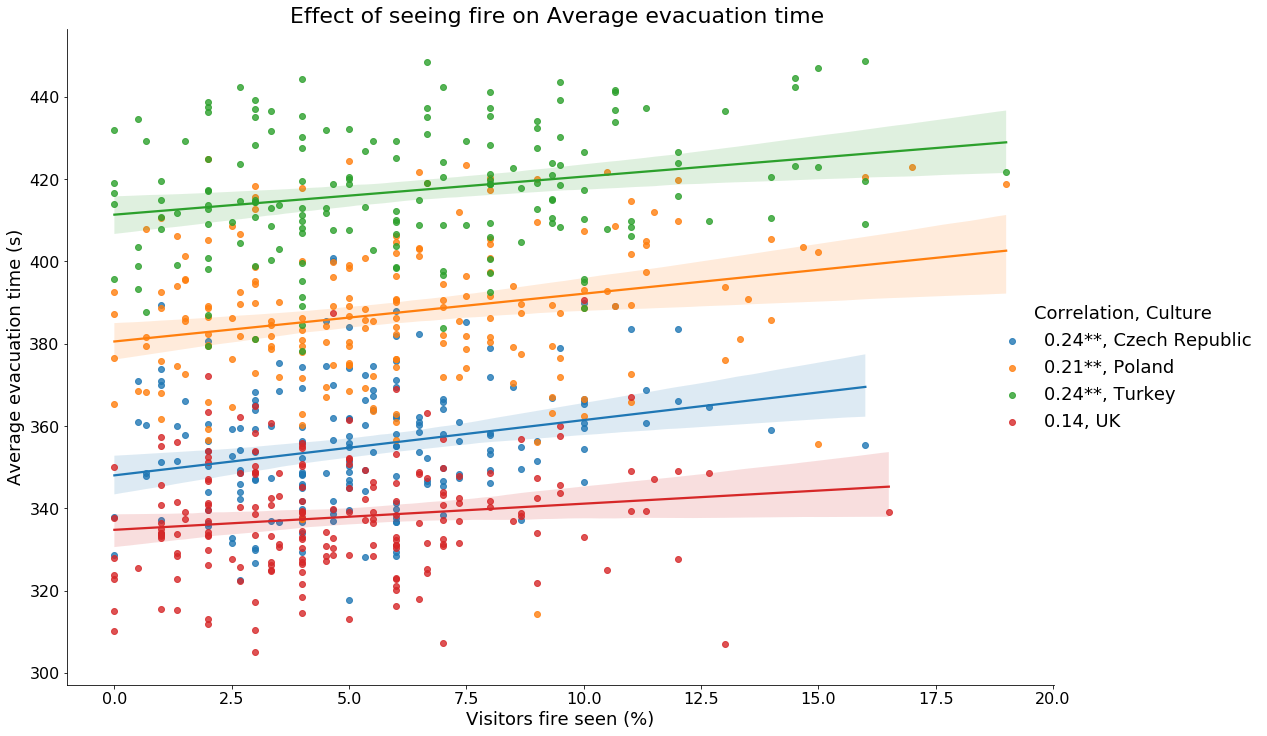

In [55]:
# Delete outliers
df_cue_fire_avgevac=df_cue_fire.loc[df_cue_fire[ "AvgevacVist"]>300]
df_cue_fire_avgevac=df_cue_fire_avgevac.loc[df_cue_fire_avgevac[ "AvgevacVist"]<450]

g=sns.lmplot(data=df_cue_fire_avgevac, x="Visitors_fire_seen_percentage" , y="AvgevacVist", hue= "Culture", robust=True,  height = 10, aspect = 1.5,    hue_order=["Czech Republic", "Poland", "Turkey", "UK"]);#
new_labels = ['0.24**, Czech Republic', '0.21**, Poland', "0.24**, Turkey", "0.14, UK"]
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


plt.rc('legend',fontsize=18)

g._legend.set_title("Correlation, Culture",prop={'size':18})

plt.xlabel('Visitors fire seen (%)', fontsize= 18)
plt.ylabel('Average evacuation time (s)', fontsize= 18)

plt.title("Effect of seeing fire on Average evacuation time ", fontsize=22)
plt.show(g)
g.savefig("FireAvgevac.png", dpi=300, bbox_inches='tight')

In [29]:
df_cue_fire_avgevac.groupby(["Culture"])[["Visitors_fire_seen_percentage", 'AvgevacVist']].corr()

Visitors_fire_seen_percentage  \
Culture                                                                       
Czech Republic Visitors_fire_seen_percentage                       1.000000   
               AvgevacVist                                         0.246325   
Poland         Visitors_fire_seen_percentage                       1.000000   
               AvgevacVist                                         0.207355   
Turkey         Visitors_fire_seen_percentage                       1.000000   
               AvgevacVist                                         0.243648   
UK             Visitors_fire_seen_percentage                       1.000000   
               AvgevacVist                                         0.140025   

                                              AvgevacVist  
Culture                                                    
Czech Republic Visitors_fire_seen_percentage     0.246325  
               AvgevacVist                       1.000000  
Poland         Visitors_fire_seen_percentage     0.207355  
               AvgevacVist                       1.000000  
Turkey         Visitors_fire_seen_percentage     0.243648  
               AvgevacVist                       1.000000  
UK             Visitors_fire_seen_percentage     0.140025  
               AvgevacVist                       1.000000

In [30]:
# Test correlation and significance
df_cue_fire_cz=df_cue_fire_avgevac[df_cue_fire_avgevac.Culture == "Czech Republic"]
df_cue_fire_cz_vistfireseen= df_cue_fire_cz[ "Visitors_fire_seen_percentage"]
df_cue_fire_cz_Avgevac = df_cue_fire_cz["AvgevacVist"]

df_cue_fire_po=df_cue_fire_avgevac[df_cue_fire_avgevac.Culture == "Poland"]
df_cue_fire_po_vistfireseen= df_cue_fire_po[ "Visitors_fire_seen_percentage"]
df_cue_fire_po_Avgevac = df_cue_fire_po["AvgevacVist"]

df_cue_fire_tu=df_cue_fire_avgevac[df_cue_fire_avgevac.Culture == "Turkey"]
df_cue_fire_tu_vistfireseen= df_cue_fire_tu[ "Visitors_fire_seen_percentage"]
df_cue_fire_tu_Avgevac = df_cue_fire_tu["AvgevacVist"]

df_cue_fire_uk=df_cue_fire_avgevac[df_cue_fire_avgevac.Culture == "UK"]
df_cue_fire_uk_vistfireseen= df_cue_fire_uk[ "Visitors_fire_seen_percentage"]
df_cue_fire_uk_Avgevac = df_cue_fire_uk["AvgevacVist"]


#print(df_cue_fire_avgevac.groupby(["Culture"])[["Visitors_informed_by_fire_percentage", 'AvgevacVist']])

# [["Visitors_informed_by_fire_percentage", 'AvgevacVist']].pearsonr()

print ("Czech Republic:", pearsonr(df_cue_fire_cz_vistfireseen, df_cue_fire_cz_Avgevac))
print ("Poland:",pearsonr(df_cue_fire_po_vistfireseen, df_cue_fire_po_Avgevac))
print ("Turkey:",pearsonr(df_cue_fire_tu_vistfireseen, df_cue_fire_tu_Avgevac))
print ("UK:",pearsonr(df_cue_fire_uk_vistfireseen, df_cue_fire_uk_Avgevac))


Czech Republic: (0.24632503058146146, 0.0007251067757342002)
Poland: (0.20735481932756575, 0.003630324737362899)
Turkey: (0.2436481048666541, 0.0012366903089919955)
UK: (0.14002468949560853, 0.05149651609275208)


<h2>Affiliation<h2>
<h3>Average response time<h3>

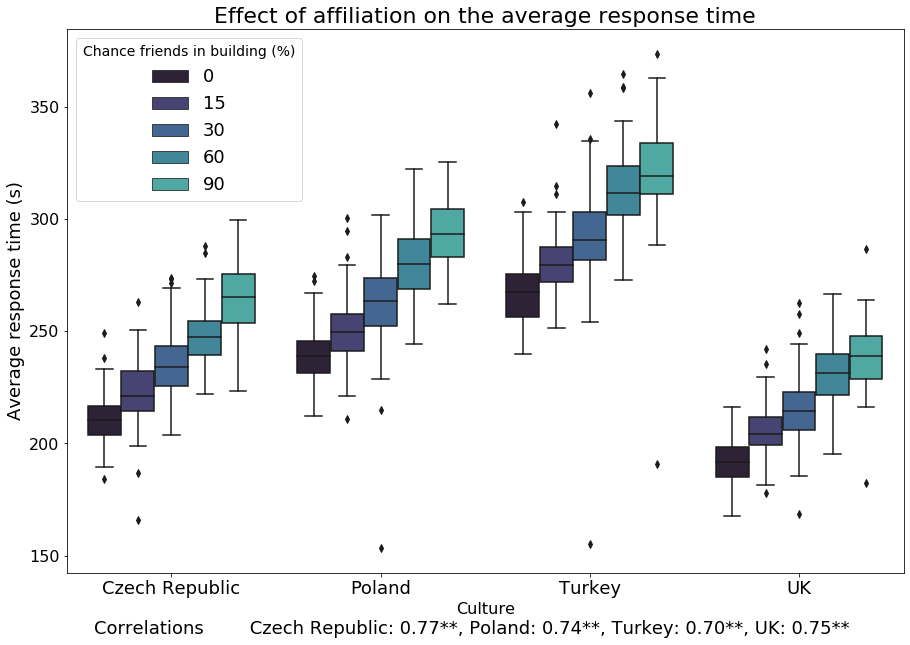

In [70]:
#Affiliation

#AvgResp


df_Affiliation=df_allscenarios.loc[df_allscenarios[ "Num_staff"]==20]
df_Affiliation=df_Affiliation.loc[df_Affiliation[ "Familiarity"]==50]
df_Affiliation=df_Affiliation.loc[df_Affiliation[ "Num_Visitors"]<201]
df_Affiliation=df_Affiliation.loc[df_Affiliation[ "Num_Visitors"]>99]
df_Affiliation=df_Affiliation.loc[df_Affiliation[ "Num_staff"]==20]

df_Affiliation_avgresp=df_Affiliation.loc[df_Affiliation[ "AvgrespVist"]>150]
plt.rc('legend',fontsize=16)
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['xtick.labelsize'] = 18
sns.set_palette("mako")
plt.figure(figsize=(15,10))

Affiliation_boxplot = sns.boxplot(x="Culture", y="AvgrespVist", data=df_Affiliation_avgresp, hue = "Chance_friends_in_building", order=["Czech Republic", "Poland", "Turkey", "UK"])

plt.legend(title='Chance friends in building (%)', fontsize=18)
Affiliation_boxplot.set_ylabel("Average response time (s)", fontsize= 18)
plt.figtext(0.5, 0.04, "Correlations        Czech Republic: 0.77**, Poland: 0.74**, Turkey: 0.70**, UK: 0.75**", ha="center", fontsize=18,)


#plt.show()
#plt.savefig("AffiliationAvgresp.png", dpi=300)



df_Affiliation_avgresp.groupby(["Culture"])[['Chance_friends_in_building', 'AvgrespVist']].corr()

plt.title("Effect of affiliation on the average response time", fontsize=22)


plt.savefig("AffiliationAvgresp.png", dpi=300, bbox_inches='tight')



In [71]:
# Test correlation and significance
df_Affiliation_cz=df_Affiliation_avgresp[df_Affiliation_avgresp.Culture == "Czech Republic"]
df_Affiliation_cz_vistfireseen= df_Affiliation_cz[ "Chance_friends_in_building"]
df_Affiliation_cz_Avgresp = df_Affiliation_cz["AvgrespVist"]

df_Affiliation_po=df_Affiliation_avgresp[df_Affiliation_avgresp.Culture == "Poland"]
df_Affiliation_po_vistfireseen= df_Affiliation_po[ "Chance_friends_in_building"]
df_Affiliation_po_Avgresp = df_Affiliation_po["AvgrespVist"]

df_Affiliation_tu=df_Affiliation_avgresp[df_Affiliation_avgresp.Culture == "Turkey"]
df_Affiliation_tu_vistfireseen= df_Affiliation_tu[ "Chance_friends_in_building"]
df_Affiliation_tu_Avgresp = df_Affiliation_tu["AvgrespVist"]

df_Affiliation_uk=df_Affiliation_avgresp[df_Affiliation_avgresp.Culture == "UK"]
df_Affiliation_uk_vistfireseen= df_Affiliation_uk[ "Chance_friends_in_building"]
df_Affiliation_uk_Avgresp = df_Affiliation_uk["AvgrespVist"]

print ("Czech Republic:", pearsonr(df_Affiliation_cz_vistfireseen, df_Affiliation_cz_Avgresp))
print ("Poland:",pearsonr(df_Affiliation_po_vistfireseen, df_Affiliation_po_Avgresp))
print ("Turkey:",pearsonr(df_Affiliation_tu_vistfireseen, df_Affiliation_tu_Avgresp))
print ("UK:",pearsonr(df_Affiliation_uk_vistfireseen, df_Affiliation_uk_Avgresp))



Czech Republic: (0.77388598445551, 6.662481201889844e-125)
Poland: (0.7362522402371698, 2.6759098339182583e-110)
Turkey: (0.7043545624999143, 6.067262818259483e-95)
UK: (0.7528064375267336, 5.651255809249531e-118)


<h3>Average evacuation time<h3>

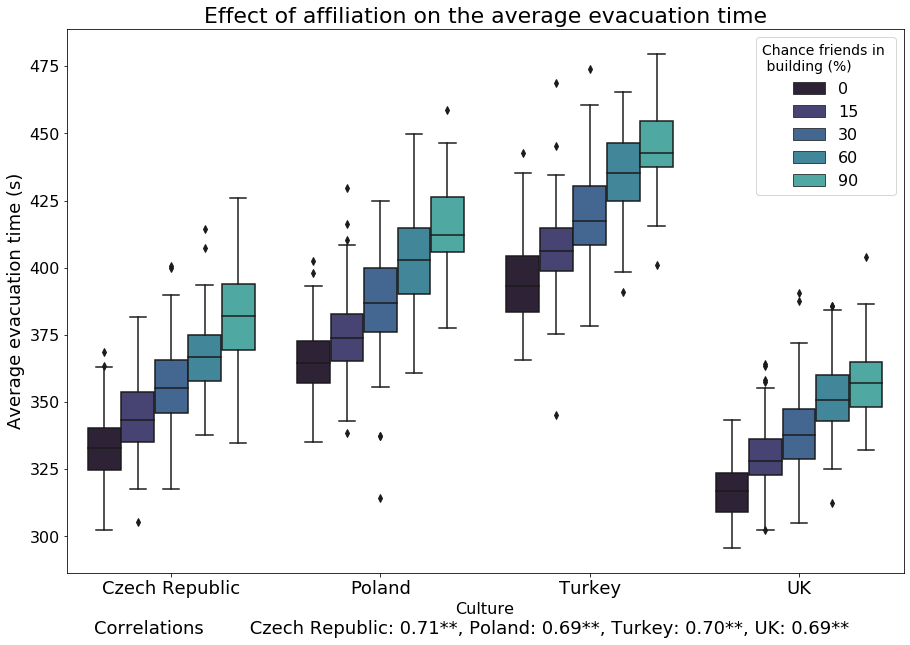

In [77]:
#AvgEvac


# Delete outliers
df_Affiliation_avgevac=df_Affiliation.loc[df_Affiliation[ "AvgevacVist"]>275]
df_Affiliation_avgevac=df_Affiliation_avgevac.loc[df_Affiliation_avgevac[ "AvgevacVist"]<480]

sns.set_palette("mako")
plt.figure(figsize=(15,10))

Affiliation_boxplot = sns.boxplot(x="Culture", y="AvgevacVist", data=df_Affiliation_avgevac, hue = "Chance_friends_in_building", order=["Czech Republic", "Poland", "Turkey", "UK"])

plt.legend(title='Chance friends in \n building (%)', loc= "upper right")
Affiliation_boxplot.set_ylabel("Average evacuation time (s)", fontsize=18)
plt.figtext(0.5, 0.04, "Correlations        Czech Republic: 0.71**, Poland: 0.69**, Turkey: 0.70**, UK: 0.69**", ha="center", fontsize=18,)

df_Affiliation_avgevac.groupby(["Culture"])[['Chance_friends_in_building', 'AvgevacVist']].corr()


plt.rc('legend',fontsize=16)
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['xtick.labelsize'] = 18



plt.title("Effect of affiliation on the average evacuation time", fontsize=22)


plt.savefig("AffiliationAvgevac.png", dpi=300, bbox_inches='tight')

In [66]:
# Test correlation and significance
df_Affiliation_cz=df_Affiliation_avgevac[df_Affiliation_avgevac.Culture == "Czech Republic"]
df_Affiliation_cz_vistfireseen= df_Affiliation_cz[ "Chance_friends_in_building"]
df_Affiliation_cz_Avgevac = df_Affiliation_cz["AvgevacVist"]

df_Affiliation_po=df_Affiliation_avgevac[df_Affiliation_avgevac.Culture == "Poland"]
df_Affiliation_po_vistfireseen= df_Affiliation_po[ "Chance_friends_in_building"]
df_Affiliation_po_Avgevac = df_Affiliation_po["AvgevacVist"]

df_Affiliation_tu=df_Affiliation_avgevac[df_Affiliation_avgevac.Culture == "Turkey"]
df_Affiliation_tu_vistfireseen= df_Affiliation_tu[ "Chance_friends_in_building"]
df_Affiliation_tu_Avgevac = df_Affiliation_tu["AvgevacVist"]

df_Affiliation_uk=df_Affiliation_avgevac[df_Affiliation_avgevac.Culture == "UK"]
df_Affiliation_uk_vistfireseen= df_Affiliation_uk[ "Chance_friends_in_building"]
df_Affiliation_uk_Avgevac = df_Affiliation_uk["AvgevacVist"]


print ("Czech Republic:", pearsonr(df_Affiliation_cz_vistfireseen, df_Affiliation_cz_Avgevac))
print ("Poland:",pearsonr(df_Affiliation_po_vistfireseen, df_Affiliation_po_Avgevac))
print ("Turkey:",pearsonr(df_Affiliation_tu_vistfireseen, df_Affiliation_tu_Avgevac))
print ("UK:",pearsonr(df_Affiliation_uk_vistfireseen, df_Affiliation_uk_Avgevac))



NameError: name 'pearsonr' is not defined

In [90]:
# Test cause movement time
from ast import literal_eval

#df_Affiliation_avgevac.Movement_times_visitors= df_Affiliation_avgevac.Movement_times_visitors.apply(literal_eval)


df_Affiliation_avgevac["Movement_times_visitors"] 

#df_Affiliation_avgevac=df_Affiliation_avgevac.reset_index()
df_Affiliation_avgevac["Avgmovement"] = " "
for y in df_Affiliation_avgevac.index:
    
    z=df_Affiliation_avgevac.iloc[y]['Movement_times_visitors']
    df_Affiliation_avgevac["Avgmovement"][y]=np.mean(z)

C:\Users\elvir\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


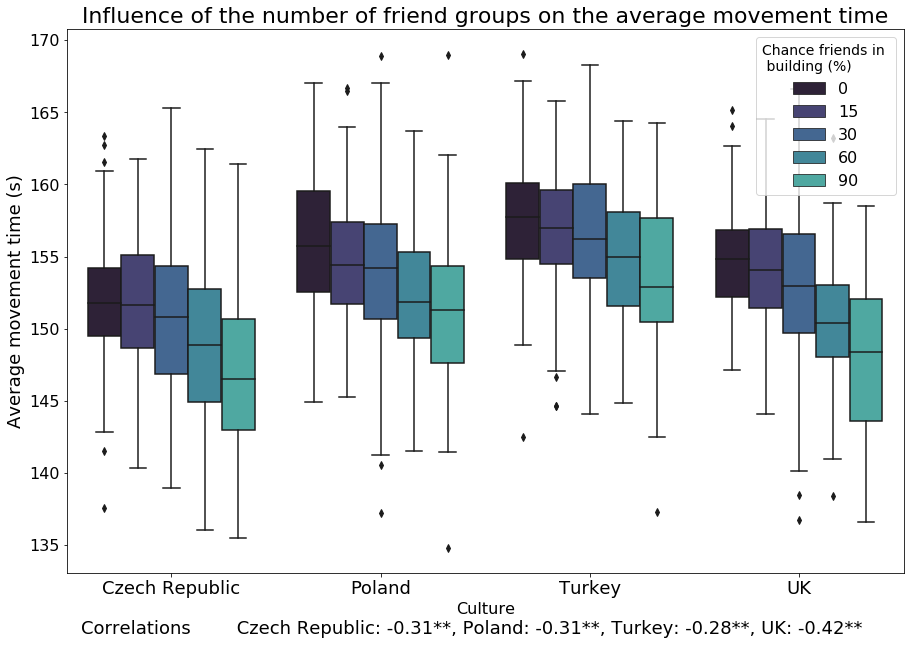

In [93]:
#Movement time

df_Affiliation_avgevac=df_Affiliation_avgevac.loc[df_Affiliation_avgevac[ "Avgmovement"]>130]  
df_Affiliation_avgevac=df_Affiliation_avgevac.loc[df_Affiliation_avgevac[ "Avgmovement"]<170]  
plt.figure(figsize=(15,10))

Affiliation_boxplot = sns.boxplot(x="Culture", y="Avgmovement", data=df_Affiliation_avgevac, hue = "Chance_friends_in_building", order=["Czech Republic", "Poland", "Turkey", "UK"])

plt.legend(title='Chance friends in \n building (%)', loc= "upper right")

plt.title("Influence of the number of friend groups on the average movement time", fontsize=22)

Affiliation_boxplot.set_ylabel("Average movement time (s)", fontsize=18)
plt.figtext(0.5, 0.04, "Correlations        Czech Republic: -0.31**, Poland: -0.31**, Turkey: -0.28**, UK: -0.42**", ha="center", fontsize=18)
plt.savefig("Affiliationmovement.png", dpi=300)


plt.rc('legend',fontsize=16)
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['xtick.labelsize'] = 18


plt.savefig("Affiliationmovement.png", dpi=300, bbox_inches='tight')

In [84]:
# Test correlation and significance
df_Affiliation_cz=df_Affiliation_avgevac[df_Affiliation_avgevac.Culture == "Czech Republic"]
df_Affiliation_cz_vistfireseen= df_Affiliation_cz[ "Chance_friends_in_building"]
df_Affiliation_cz_Avgevac = df_Affiliation_cz["Avgmovement"]

df_Affiliation_po=df_Affiliation_avgevac[df_Affiliation_avgevac.Culture == "Poland"]
df_Affiliation_po_vistfireseen= df_Affiliation_po[ "Chance_friends_in_building"]
df_Affiliation_po_Avgevac = df_Affiliation_po["Avgmovement"]

df_Affiliation_tu=df_Affiliation_avgevac[df_Affiliation_avgevac.Culture == "Turkey"]
df_Affiliation_tu_vistfireseen= df_Affiliation_tu[ "Chance_friends_in_building"]
df_Affiliation_tu_Avgevac = df_Affiliation_tu["Avgmovement"]

df_Affiliation_uk=df_Affiliation_avgevac[df_Affiliation_avgevac.Culture == "UK"]
df_Affiliation_uk_vistfireseen= df_Affiliation_uk[ "Chance_friends_in_building"]
df_Affiliation_uk_Avgevac = df_Affiliation_uk["Avgmovement"]

print ("Czech Republic:", pearsonr(df_Affiliation_cz_vistfireseen, df_Affiliation_cz_Avgevac))
print ("Poland:",pearsonr(df_Affiliation_po_vistfireseen, df_Affiliation_po_Avgevac))
print ("Turkey:",pearsonr(df_Affiliation_tu_vistfireseen, df_Affiliation_tu_Avgevac))
print ("UK:",pearsonr(df_Affiliation_uk_vistfireseen, df_Affiliation_uk_Avgevac))

Czech Republic: (-0.31097028713479496, 2.28535702899391e-15)
Poland: (-0.3090196902780723, 1.4619224846914016e-15)
Turkey: (-0.2830708091741813, 8.169402479182214e-13)
UK: (-0.4168811842922294, 3.2480714504914957e-28)


<h3>Evac95<h3>

Chance_friends_in_building  \
Culture                                                                 
Czech Republic Chance_friends_in_building                    1.000000   
               Evac95                                        0.347907   
Poland         Chance_friends_in_building                    1.000000   
               Evac95                                        0.310572   
Turkey         Chance_friends_in_building                    1.000000   
               Evac95                                        0.303944   
UK             Chance_friends_in_building                    1.000000   
               Evac95                                        0.262378   

                                             Evac95  
Culture                                              
Czech Republic Chance_friends_in_building  0.347907  
               Evac95                      1.000000  
Poland         Chance_friends_in_building  0.310572  
               Evac95                      1.000000  
Turkey         Chance_friends_in_building  0.303944  
               Evac95                      1.000000  
UK             Chance_friends_in_building  0.262378  
               Evac95                      1.000000

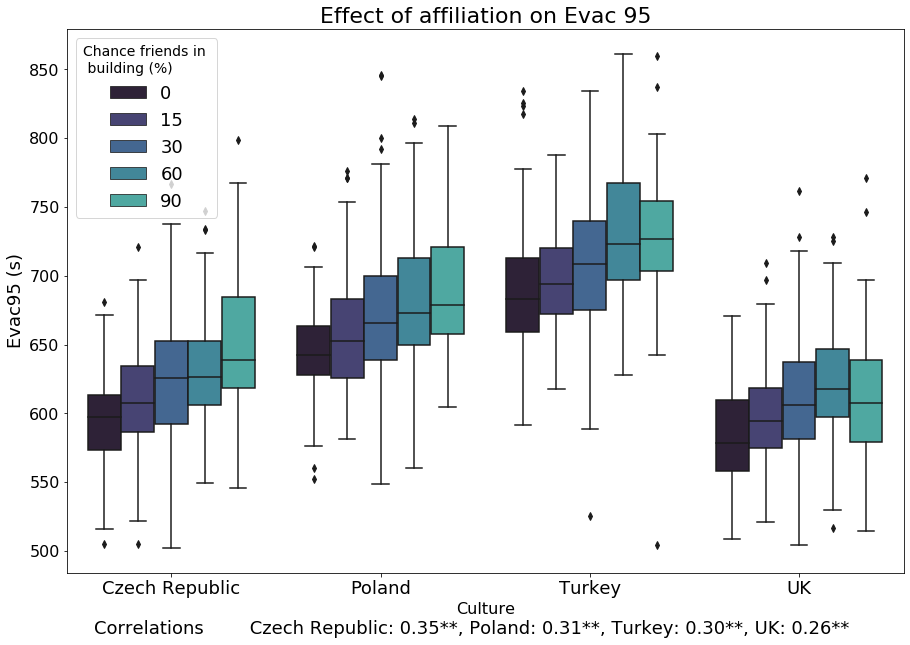

In [83]:
#Evac95

# Delete outliers
df_Affiliation_evac95=df_Affiliation.loc[df_Affiliation[ "Evac95"]>490]
df_Affiliation_evac95=df_Affiliation_evac95.loc[df_Affiliation[ "Evac95"]<870]


sns.set_palette("mako")
plt.figure(figsize=(15,10))

Affiliation_boxplot = sns.boxplot(x="Culture", y="Evac95", data=df_Affiliation_evac95, hue = "Chance_friends_in_building", order=["Czech Republic", "Poland", "Turkey", "UK"])

plt.legend(title='Chance friends in \n building (%)', fontsize=18)
Affiliation_boxplot.set_ylabel("Evac95 (s)", fontsize=18)
plt.figtext(0.5, 0.04, "Correlations        Czech Republic: 0.35**, Poland: 0.31**, Turkey: 0.30**, UK: 0.26**", ha="center", fontsize=18,)

plt.rc('legend',fontsize=16)
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['xtick.labelsize'] = 18

plt.title("Effect of affiliation on Evac 95", fontsize=22)


plt.savefig("Affiliationevac95.png", dpi=300, bbox_inches='tight')


df_Affiliation_evac95.groupby(["Culture"])[['Chance_friends_in_building', 'Evac95']].corr()

In [39]:
# Test correlation and significance
df_Affiliation_cz=df_Affiliation_evac95[df_Affiliation_evac95.Culture == "Czech Republic"]
df_Affiliation_cz_vistfireseen= df_Affiliation_cz[ "Chance_friends_in_building"]
df_Affiliation_cz_Evac95 = df_Affiliation_cz["Evac95"]

df_Affiliation_po=df_Affiliation_evac95[df_Affiliation_evac95.Culture == "Poland"]
df_Affiliation_po_vistfireseen= df_Affiliation_po[ "Chance_friends_in_building"]
df_Affiliation_po_Evac95 = df_Affiliation_po["Evac95"]

df_Affiliation_tu=df_Affiliation_evac95[df_Affiliation_evac95.Culture == "Turkey"]
df_Affiliation_tu_vistfireseen= df_Affiliation_tu[ "Chance_friends_in_building"]
df_Affiliation_tu_Evac95 = df_Affiliation_tu["Evac95"]

df_Affiliation_uk=df_Affiliation_evac95[df_Affiliation_evac95.Culture == "UK"]
df_Affiliation_uk_vistfireseen= df_Affiliation_uk[ "Chance_friends_in_building"]
df_Affiliation_uk_Evac95 = df_Affiliation_uk["Evac95"]


print ("Czech Republic:", pearsonr(df_Affiliation_cz_vistfireseen, df_Affiliation_cz_Evac95))
print ("Poland:",pearsonr(df_Affiliation_po_vistfireseen, df_Affiliation_po_Evac95))
print ("Turkey:",pearsonr(df_Affiliation_tu_vistfireseen, df_Affiliation_tu_Evac95))
print ("UK:",pearsonr(df_Affiliation_uk_vistfireseen, df_Affiliation_uk_Evac95))


Czech Republic: (0.34790654537685073, 4.43072614045938e-19)
Poland: (0.31057231251798934, 9.856597597044984e-16)
Turkey: (0.30394375301797477, 1.0207852656152429e-14)
UK: (0.2623776786524247, 1.666388497102336e-11)


<h2>Setting, Close proximity to others<h2>
<h3>Average response time<h3>

Num_Visitors  AvgrespVist
Culture                                               
Czech Republic Num_Visitors      1.000000     0.167798
               AvgrespVist       0.167798     1.000000
Poland         Num_Visitors      1.000000     0.087238
               AvgrespVist       0.087238     1.000000
Turkey         Num_Visitors      1.000000     0.103437
               AvgrespVist       0.103437     1.000000
UK             Num_Visitors      1.000000     0.131777
               AvgrespVist       0.131777     1.000000

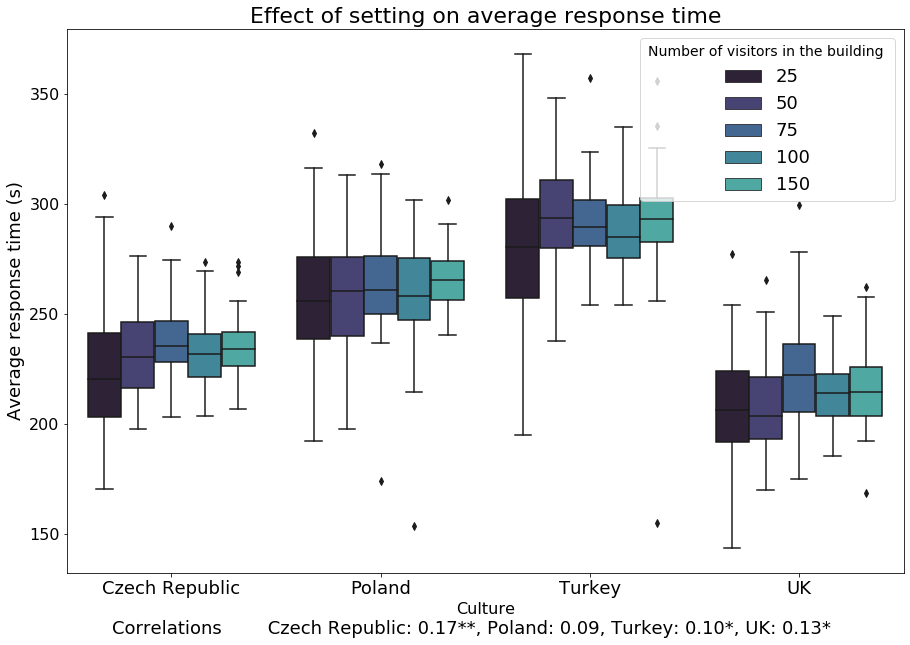

In [94]:
#Affiliation

#AvgResp

df_Setting=df_allscenarios.loc[df_allscenarios[ "Num_staff"]==20]
df_Setting=df_Setting.loc[df_Setting[ "Familiarity"]==50]
df_Setting=df_Setting.loc[df_Setting[ "Familiarity"]==50]
df_Setting=df_Setting.loc[df_Setting[ "Chance_friends_in_building"]==30]

df_Setting=df_Setting.loc[df_Setting[ "Num_Visitors"]<200]

# Delete outliers
df_Setting_avgresp=df_Setting.loc[df_Setting[ "AvgrespVist"]<380]
df_Setting_avgresp=df_Setting_avgresp.loc[df_Setting_avgresp[ "AvgrespVist"]>125]

sns.set_palette("mako")
plt.figure(figsize=(15,10))

Affiliation_boxplot = sns.boxplot(x="Culture", y="AvgrespVist", data=df_Setting_avgresp, hue = "Num_Visitors", order=["Czech Republic", "Poland", "Turkey", "UK"])

plt.legend(title='Number of visitors in the building ', fontsize= 18)
Affiliation_boxplot.set_ylabel("Average response time (s)", fontsize= 18)
plt.figtext(0.5, 0.04, "Correlations        Czech Republic: 0.17**, Poland: 0.09, Turkey: 0.10*, UK: 0.13*", ha="center", fontsize=18,)


plt.rc('legend',fontsize=16)
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['xtick.labelsize'] = 18

plt.title("Effect of setting on average response time", fontsize=22)


plt.savefig("SettingAvgresp.png", dpi=300, bbox_inches='tight')
#plt.show()

df_Setting_avgresp.groupby(["Culture"])[['Num_Visitors', 'AvgrespVist']].corr()



In [42]:
# Test correlation and significance
df_Setting_cz=df_Setting_avgresp[df_Setting_avgresp.Culture == "Czech Republic"]
df_Setting_cz_vistfireseen= df_Setting_cz[ "Num_Visitors"]
df_Setting_cz_Avgresp = df_Setting_cz["AvgrespVist"]

df_Setting_po=df_Setting_avgresp[df_Setting_avgresp.Culture == "Poland"]
df_Setting_po_vistfireseen= df_Setting_po[ "Num_Visitors"]
df_Setting_po_Avgresp = df_Setting_po["AvgrespVist"]

df_Setting_tu=df_Setting_avgresp[df_Setting_avgresp.Culture == "Turkey"]
df_Setting_tu_vistfireseen= df_Setting_tu[ "Num_Visitors"]
df_Setting_tu_Avgresp = df_Setting_tu["AvgrespVist"]

df_Setting_uk=df_Setting_avgresp[df_Setting_avgresp.Culture == "UK"]
df_Setting_uk_vistfireseen= df_Setting_uk[ "Num_Visitors"]
df_Setting_uk_Avgresp = df_Setting_uk["AvgrespVist"]



print ("Czech Republic:", pearsonr(df_Setting_cz_vistfireseen, df_Setting_cz_Avgresp))
print ("Poland:",pearsonr(df_Setting_po_vistfireseen, df_Setting_po_Avgresp))
print ("Turkey:",pearsonr(df_Setting_tu_vistfireseen, df_Setting_tu_Avgresp))
print ("UK:",pearsonr(df_Setting_uk_vistfireseen, df_Setting_uk_Avgresp))



Czech Republic: (0.16779784257069139, 0.00248235006330551)
Poland: (0.08723753997416442, 0.11425913026375899)
Turkey: (0.10343696453785405, 0.06293356278091695)
UK: (0.13177704313245772, 0.016120981682723568)


In [95]:
# Test cause movement time
from ast import literal_eval

df_Setting.Notification_times_visitors= df_Setting.Notification_times_visitors.apply(literal_eval)


df_Setting["Notification_times_visitors"] 

df_Setting=df_Setting.reset_index()
df_Setting["Avgnotif"] = " "
for y in df_Setting.index:
    
    z=df_Setting.iloc[y]['Notification_times_visitors']
    df_Setting["Avgnotif"][y]=np.mean(z)

C:\Users\elvir\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


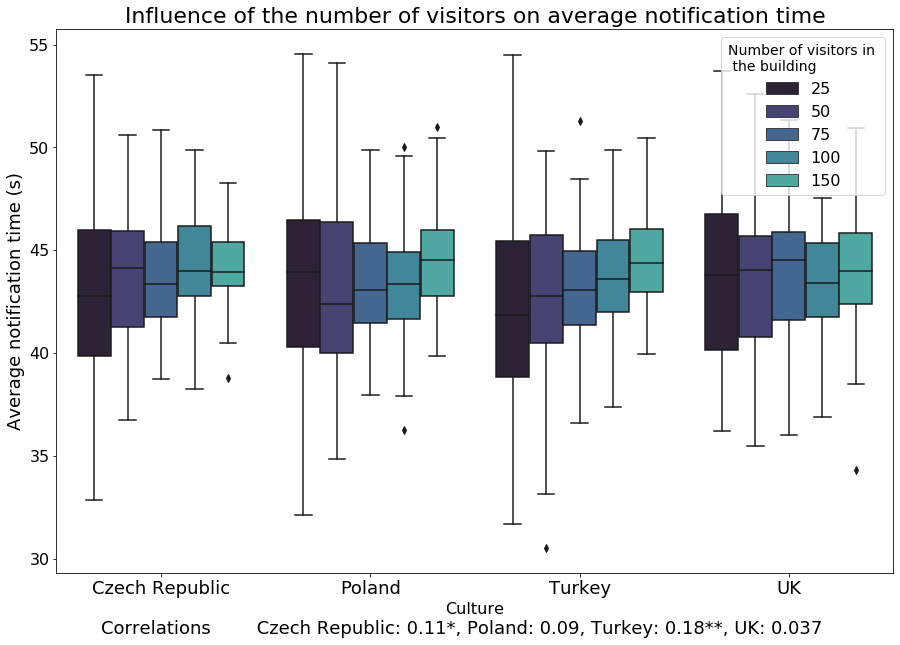

In [102]:
#Notif time

df_Setting=df_Setting.loc[df_Setting[ "Avgnotif"]>30]
df_Setting=df_Setting.loc[df_Setting[ "Avgnotif"]<55]

plt.figure(figsize=(15,10))

Affiliation_boxplot = sns.boxplot(x="Culture", y="Avgnotif", data=df_Setting, hue = "Num_Visitors", order=["Czech Republic", "Poland", "Turkey", "UK"])

plt.legend(title='Number of visitors in \n the building', loc= "upper right")

plt.title("Influence of the number of visitors on average notification time", fontsize=22)

Affiliation_boxplot.set_ylabel("Average notification time (s)", fontsize=18)
plt.figtext(0.5, 0.04, "Correlations        Czech Republic: 0.11*, Poland: 0.09, Turkey: 0.18**, UK: 0.037", ha="center", fontsize=18,)
plt.savefig("NotifSetting.png", dpi=300, bbox_inches='tight')

In [102]:
# Test correlation and significance
df_Setting_cz=df_Setting_avgevac[df_Setting_avgevac.Culture == "Czech Republic"]
df_Setting_cz_vistfireseen= df_Setting_cz[ "Num_Visitors"]
df_Setting_cz_Avgevac = df_Setting_cz["Avgnotif"]

df_Setting_po=df_Setting_avgevac[df_Setting_avgevac.Culture == "Poland"]
df_Setting_po_vistfireseen= df_Setting_po[ "Num_Visitors"]
df_Setting_po_Avgevac = df_Setting_po["Avgnotif"]

df_Setting_tu=df_Setting_avgevac[df_Setting_avgevac.Culture == "Turkey"]
df_Setting_tu_vistfireseen= df_Setting_tu[ "Num_Visitors"]
df_Setting_tu_Avgevac = df_Setting_tu["Avgnotif"]

df_Setting_uk=df_Setting_avgevac[df_Setting_avgevac.Culture == "UK"]
df_Setting_uk_vistfireseen= df_Setting_uk[ "Num_Visitors"]
df_Setting_uk_Avgevac = df_Setting_uk["Avgnotif"]


print ("Czech Republic:", pearsonr(df_Setting_cz_vistfireseen, df_Setting_cz_Avgevac))
print ("Poland:",pearsonr(df_Setting_po_vistfireseen, df_Setting_po_Avgevac))
print ("Turkey:",pearsonr(df_Setting_tu_vistfireseen, df_Setting_tu_Avgevac))
print ("UK:",pearsonr(df_Setting_uk_vistfireseen, df_Setting_uk_Avgevac))


Czech Republic: (0.11460552290342453, 0.03954068466944401)
Poland: (0.0941092055712228, 0.0883299561165728)
Turkey: (0.1826044358134755, 0.0009426283378332026)
UK: (0.03719632003614679, 0.49940465335121065)


<h3>Average evacuation time<h3>

Num_Visitors  AvgevacVist
Culture                                               
Czech Republic Num_Visitors      1.000000     0.129869
               AvgevacVist       0.129869     1.000000
Poland         Num_Visitors      1.000000     0.063022
               AvgevacVist       0.063022     1.000000
Turkey         Num_Visitors      1.000000     0.128712
               AvgevacVist       0.128712     1.000000
UK             Num_Visitors      1.000000     0.169425
               AvgevacVist       0.169425     1.000000

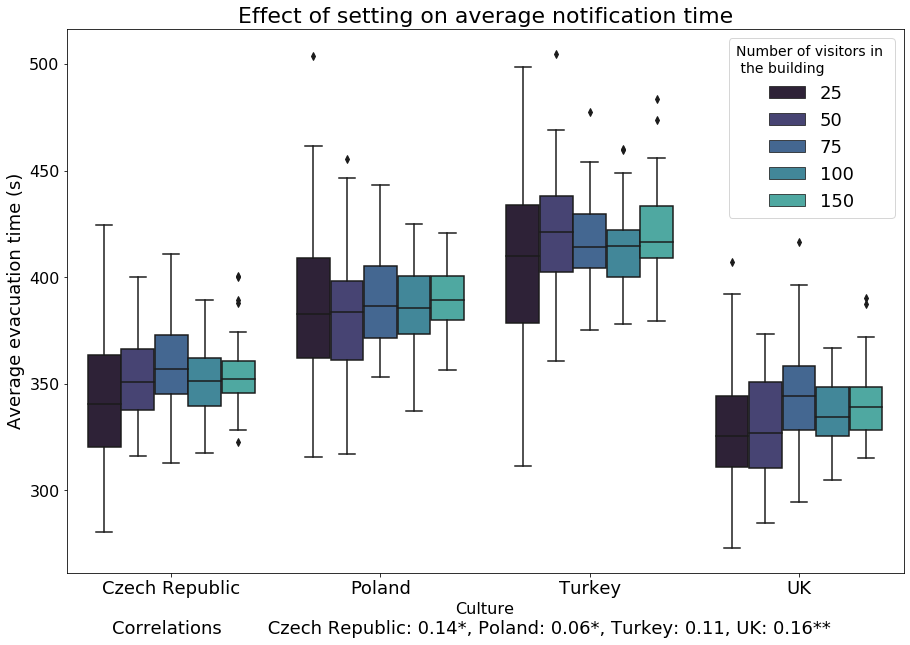

In [108]:
# Delete outliers
df_Setting_avgevac=df_Setting.loc[df_Setting[ "AvgevacVist"]>250]
df_Setting_avgevac=df_Setting_avgevac.loc[df_Setting[ "AvgevacVist"]<525]


#df_Setting_avgresp=df_Setting_avgresp.loc[df_Setting_avgresp[ "AvgrespVist"]>125]

sns.set_palette("mako")
plt.figure(figsize=(15,10))

Affiliation_boxplot = sns.boxplot(x="Culture", y="AvgevacVist", data=df_Setting_avgevac, hue = "Num_Visitors", order=["Czech Republic", "Poland", "Turkey", "UK"])

plt.legend(title='Number of visitors in \n the building', fontsize=18)
Affiliation_boxplot.set_ylabel("Average evacuation time (s)", fontsize=18)
plt.figtext(0.5, 0.04, "Correlations        Czech Republic: 0.14*, Poland: 0.06*, Turkey: 0.11, UK: 0.16**", ha="center", fontsize=18,)


plt.title("Effect of setting on average notification time", fontsize=22)
#plt.show()
plt.savefig("SettingAvgevac.png", dpi=300, bbox_inches='tight')
df_Setting_avgevac.groupby(["Culture"])[['Num_Visitors', 'AvgevacVist']].corr()

In [45]:
# Test correlation and significance
df_Setting_cz=df_Setting_avgevac[df_Setting_avgevac.Culture == "Czech Republic"]
df_Setting_cz_vistfireseen= df_Setting_cz[ "Num_Visitors"]
df_Setting_cz_Avgevac = df_Setting_cz["AvgevacVist"]

df_Setting_po=df_Setting_avgevac[df_Setting_avgevac.Culture == "Poland"]
df_Setting_po_vistfireseen= df_Setting_po[ "Num_Visitors"]
df_Setting_po_Avgevac = df_Setting_po["AvgevacVist"]

df_Setting_tu=df_Setting_avgevac[df_Setting_avgevac.Culture == "Turkey"]
df_Setting_tu_vistfireseen= df_Setting_tu[ "Num_Visitors"]
df_Setting_tu_Avgevac = df_Setting_tu["AvgevacVist"]

df_Setting_uk=df_Setting_avgevac[df_Setting_avgevac.Culture == "UK"]
df_Setting_uk_vistfireseen= df_Setting_uk[ "Num_Visitors"]
df_Setting_uk_Avgevac = df_Setting_uk["AvgevacVist"]

print ("Czech Republic:", pearsonr(df_Setting_cz_vistfireseen, df_Setting_cz_Avgevac))
print ("Poland:",pearsonr(df_Setting_po_vistfireseen, df_Setting_po_Avgevac))
print ("Turkey:",pearsonr(df_Setting_tu_vistfireseen, df_Setting_tu_Avgevac))
print ("UK:",pearsonr(df_Setting_uk_vistfireseen, df_Setting_uk_Avgevac))


Czech Republic: (0.13559648869370064, 0.01473639497179369)
Poland: (0.05810347983910452, 0.2933603669663947)
Turkey: (0.11160569138104504, 0.04437478038314954)
UK: (0.16440941406678727, 0.00265705865217761)


<h3>Evac95<h3>

Num_Visitors    Evac95
Culture                                            
Czech Republic Num_Visitors      1.000000  0.272905
               Evac95            0.272905  1.000000
Poland         Num_Visitors      1.000000  0.159597
               Evac95            0.159597  1.000000
Turkey         Num_Visitors      1.000000  0.170889
               Evac95            0.170889  1.000000
UK             Num_Visitors      1.000000  0.217210
               Evac95            0.217210  1.000000

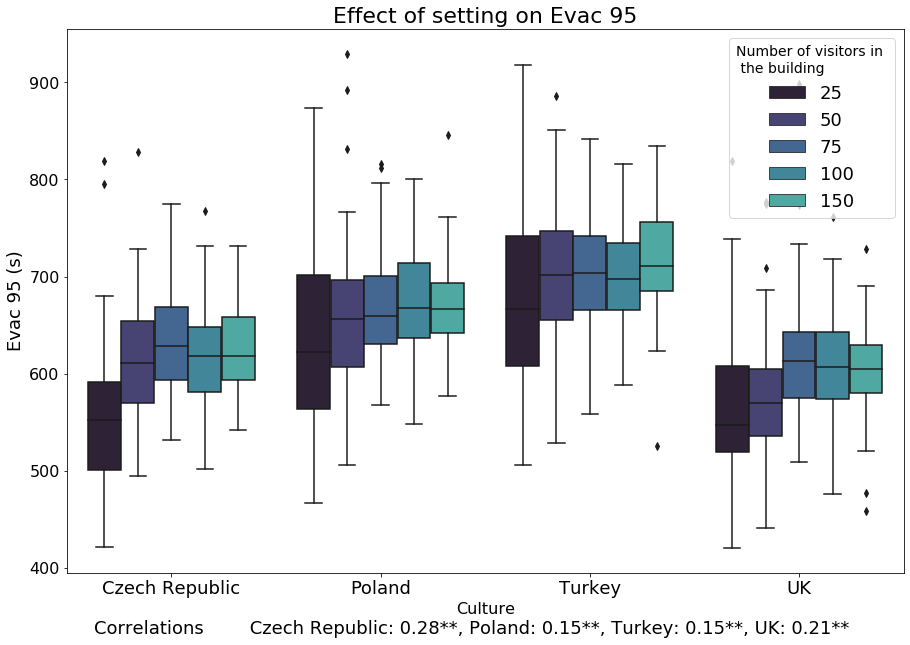

In [109]:
# Delete outliers
df_Setting_evac95=df_Setting.loc[df_Setting[ "Evac95"]>390]
df_Setting_evac95=df_Setting_evac95.loc[df_Setting_evac95[ "Evac95"]<1000]

sns.set_palette("mako")
plt.figure(figsize=(15,10))

Affiliation_boxplot = sns.boxplot(x="Culture", y="Evac95", data=df_Setting_evac95, hue = "Num_Visitors", order=["Czech Republic", "Poland", "Turkey", "UK"])

plt.legend(title='Number of visitors in \n the building', loc= "upper right", fontsize=18)
Affiliation_boxplot.set_ylabel("Evac 95 (s)", fontsize=18)
plt.figtext(0.5, 0.04, "Correlations        Czech Republic: 0.28**, Poland: 0.15**, Turkey: 0.15**, UK: 0.21**", ha="center", fontsize=18,)

plt.title("Effect of setting on Evac 95", fontsize=22)

plt.savefig("SettingEvac95.png", dpi=300, bbox_inches='tight')

#plt.show()

df_Setting_evac95.groupby(["Culture"])[['Num_Visitors', 'Evac95']].corr()

In [48]:
# Test correlation and significance
df_Setting_cz=df_Setting_evac95[df_Setting_evac95.Culture == "Czech Republic"]
df_Setting_cz_vistfireseen= df_Setting_cz[ "Num_Visitors"]
df_Setting_cz_Evac95 = df_Setting_cz["Evac95"]

df_Setting_po=df_Setting_evac95[df_Setting_evac95.Culture == "Poland"]
df_Setting_po_vistfireseen= df_Setting_po[ "Num_Visitors"]
df_Setting_po_Evac95 = df_Setting_po["Evac95"]

df_Setting_tu=df_Setting_evac95[df_Setting_evac95.Culture == "Turkey"]
df_Setting_tu_vistfireseen= df_Setting_tu[ "Num_Visitors"]
df_Setting_tu_Evac95 = df_Setting_tu["Evac95"]

df_Setting_uk=df_Setting_evac95[df_Setting_evac95.Culture == "UK"]
df_Setting_uk_vistfireseen= df_Setting_uk[ "Num_Visitors"]
df_Setting_uk_Evac95 = df_Setting_uk["Evac95"]

print ("Czech Republic:", pearsonr(df_Setting_cz_vistfireseen, df_Setting_cz_Evac95))
print ("Poland:",pearsonr(df_Setting_po_vistfireseen, df_Setting_po_Evac95))
print ("Turkey:",pearsonr(df_Setting_tu_vistfireseen, df_Setting_tu_Evac95))
print ("UK:",pearsonr(df_Setting_uk_vistfireseen, df_Setting_uk_Evac95))


Czech Republic: (0.2801555750174272, 3.499580280587234e-07)
Poland: (0.14702865199758802, 0.007649836569865632)
Turkey: (0.15354592282122875, 0.005394541554084053)
UK: (0.2140221747869326, 8.063284986385626e-05)
